In [1]:
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\Faizan Ahmad\AppData\Local\Temp\ipykernel_12728\2876882311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
customers_path = 'Customers.csv'
products_path = 'Products.csv'
transactions_path = 'Transactions.csv'


In [38]:
# Reading the data files
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)







In [39]:
print(customers.head())
print(products.head())
print(transactions.head())




  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [40]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [18]:
# # Cleaning up column names for consistency
# #customers.columns = customers.columns.str.strip().str.replace('ï»¿', '', regex=True)
# products.columns = products.columns.str.strip().str.replace('ï»¿', '', regex=True)
# transactions.columns = transactions.columns.str.strip().str.replace('ï»¿', '', regex=True)

In [42]:
print(customers.columns)

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [43]:
print(products.columns)

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


In [44]:
print(transactions.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [46]:
# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])




In [48]:
print(customers.Region.value_counts(dropna=False))

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [20]:
# Combining datasets for easier analysis
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')


In [21]:
# 1. Data Summary using describe()
print("Summary of Customers Data:")
print(customers.describe(include='all'), "\n")



Summary of Customers Data:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00 



In [22]:
print("Summary of Products Data:")
print(products.describe(include='all'), "\n")

print("Summary of Transactions Data:")
print(transactions.describe(include='all'), "\n")


Summary of Products Data:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000 

Summary of Transactions Data:
       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                 

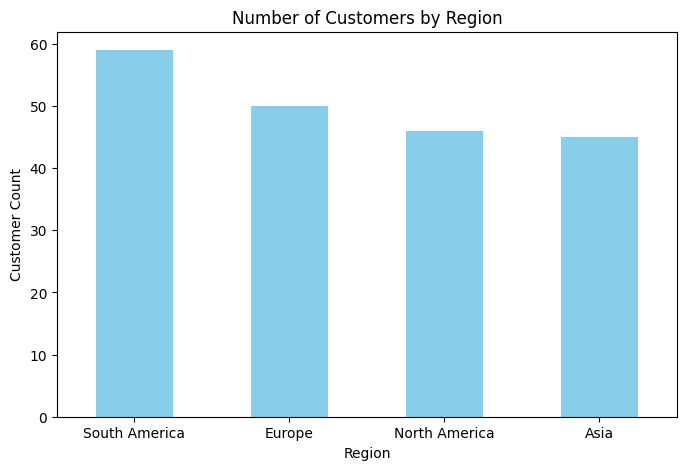

In [23]:
# 2. Distribution of customers by region
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', title='Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()


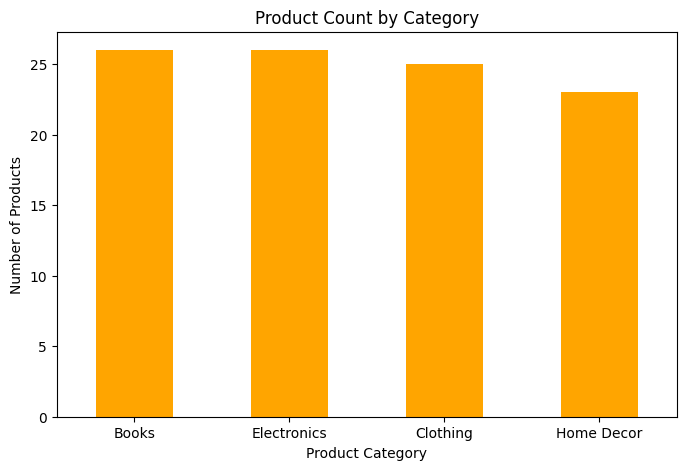

In [24]:
# 3. Distribution of products across categories
category_counts = products['Category'].value_counts()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='orange', title='Product Count by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.show()


In [25]:
# 4. Analyzing monthly sales trends
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()


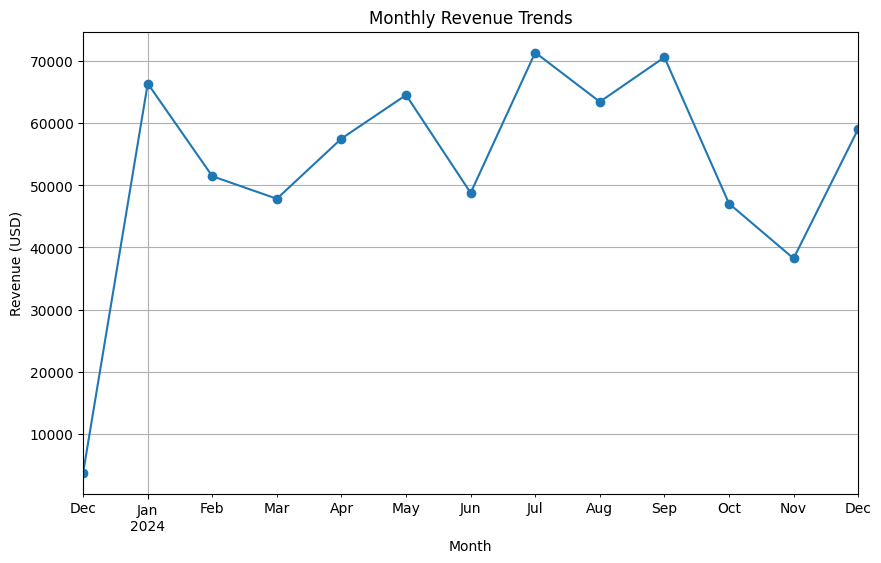

In [26]:
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()


In [27]:
# 5. Top-performing products by total revenue
top_products = (
    merged_data.groupby('ProductName')['TotalValue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)


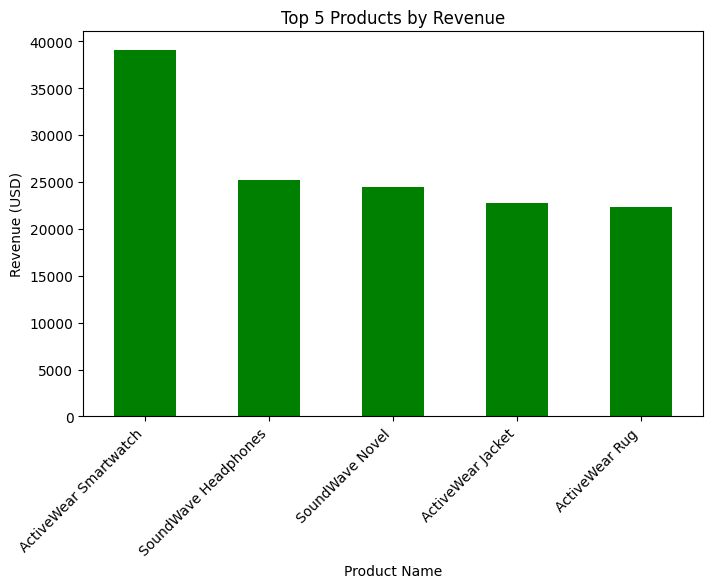

In [28]:
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='green', title='Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()
